In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import  pandas as pd
import  os
from keras.models import Sequential, load_model
from sklearn import preprocessing
import keras
import matplotlib.ticker as ticker

In [40]:
## 读入数据
dataframe = pd.read_csv(r'C:\Users\Winnie Lee\Desktop\HKU\capstone\monthly_SST_34.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
# 将整型变为float
dataset = dataset.astype('float32')
#归一化 
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# 70%的数据作为训练数据
train_size = int(len(dataset) * 0.7)
trainlist = dataset[:train_size]
testlist = dataset[train_size:]

In [41]:
def create_dataset(dataset, look_back):
#look_back = timestep
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX),np.array(dataY)

#用3个月的数据作为滑窗
look_back = 3
trainX,trainY  = create_dataset(trainlist,look_back)
testX,testY = create_dataset(testlist,look_back)

In [42]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1] ,1 ))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=4, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='MeanSquaredError', optimizer='adam')##mean_squared_error
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)
##model.save(os.path.join("DATA","Test" + ".h5"))
# make predictions

Epoch 1/100
586/586 [==============================] - 7s 11ms/step - loss: 0.0191
Epoch 2/100
586/586 [==============================] - 7s 12ms/step - loss: 0.0081
Epoch 3/100
586/586 [==============================] - 7s 12ms/step - loss: 0.0072
Epoch 4/100
586/586 [==============================] - 7s 11ms/step - loss: 0.0071
Epoch 5/100
586/586 [==============================] - 6s 11ms/step - loss: 0.0068
Epoch 6/100
586/586 [==============================] - 8s 13ms/step - loss: 0.0068
Epoch 7/100
586/586 [==============================] - 6s 10ms/step - loss: 0.0064
Epoch 8/100
586/586 [==============================] - 5s 9ms/step - loss: 0.0063
Epoch 9/100
586/586 [==============================] - 7s 13ms/step - loss: 0.0060
Epoch 10/100
586/586 [==============================] - 5s 9ms/step - loss: 0.0056
Epoch 11/100
586/586 [==============================] - 4s 8ms/step - loss: 0.0052
Epoch 12/100
586/586 [==============================] - 6s 10ms/step - loss: 0.0047
Epoc

Epoch 97/100
586/586 [==============================] - 6s 10ms/step - loss: 0.0027
Epoch 98/100
586/586 [==============================] - 6s 9ms/step - loss: 0.0027
Epoch 99/100
586/586 [==============================] - 5s 9ms/step - loss: 0.0026
Epoch 100/100
586/586 [==============================] - 6s 10ms/step - loss: 0.0027


In [43]:
#model = load_model(os.path.join("DATA","Test" + ".h5"))
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

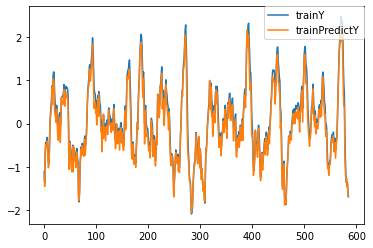

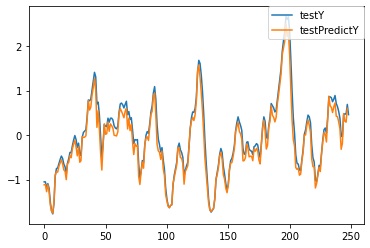

In [44]:
plt.plot(trainY,label="trainY")
plt.plot(trainPredict[1:],label="trainPredictY")
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)
plt.show()
plt.plot(testY,label="testY")
plt.plot(testPredict[1:],label="testPredictY")
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)
plt.show()

In [45]:
loss_fn = keras.losses.MeanSquaredError(reduction='sum_over_batch_size')##sum_over_batch_size
loss_fn(trainY,trainPredict)

<tf.Tensor: shape=(), dtype=float32, numpy=0.07969374>

In [46]:
loss_fn(testY[6:],testPredict[6:])

<tf.Tensor: shape=(), dtype=float32, numpy=0.059979726>

In [36]:
loss_fn(trainY,trainPredict*0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.73169935>

In [47]:
dataframe.describe()

,NINO12
count,843.000000
mean,0.034294
std,0.851341
min,-2.090000
25%,-0.550000
50%,0.000000
75%,0.535000
max,2.670000


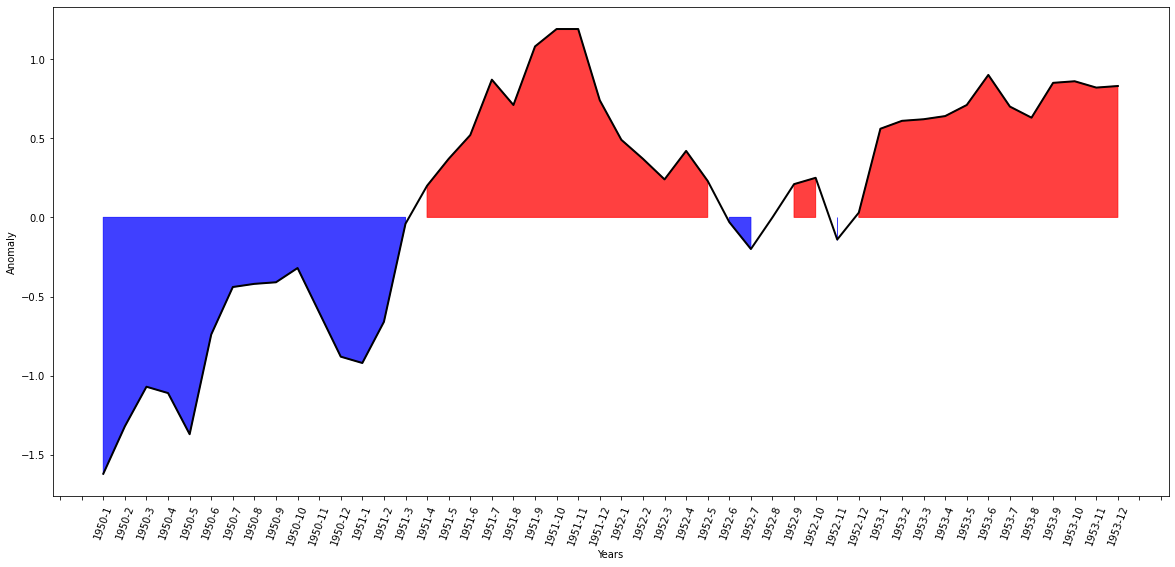

In [68]:
#dates = pd.date_range('1981','2011', freq='MS', closed='left')
#oni_df = pd.DataFrame({'date':dates,'oni':oni_ts})
#oni_df.set_index('date', inplace=True)
plot_dt = pd.read_csv(r'C:\Users\Winnie Lee\Desktop\HKU\capstone\monthly_SST_34.csv')
plt.figure(figsize=(20,9))
plt.plot(plot_dt.YR[:48], plot_dt.NINO12[:48], 'black', alpha=1, linewidth=2)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.fill_between(plot_dt.YR[:48], 0, plot_dt.NINO12[:48], plot_dt.NINO12[:48]>0,
                color='red', alpha=0.75)
plt.fill_between(plot_dt.YR[:48], 0, plot_dt.NINO12[:48], plot_dt.NINO12[:48]<0,
                color='blue', alpha=0.75)

plt.xticks(rotation=70)
plt.xlabel('Years')
plt.ylabel('Anomaly')
plt.savefig("SSTA.png")
plt.show()
#plt.title('SSTA 70-year (1950-2020)', fontsize=12)

In [63]:

plt.savefig("SSTA.png")

<Figure size 432x288 with 0 Axes>

## 下面是草稿

In [39]:
def my_loss_fn(y_true,y_pred):
    squared_difference = tf.square(y_true-y_pred)
    return tf.reduce_mean(squared_difference,axis=-1)
model.compile(optimizer='adam', loss=my_loss_fn)

In [38]:
import tensorflow as tf

In [38]:
dataframe.head()

,NINO12
0,-1.62
1,-1.32
2,-1.07
3,-1.11
4,-1.37
